# **Import libraries**

Imports libraries such as os, numpy, pandas, sklearn, keras, matplotlib, and seaborn, which are commonly used for data analysis, machine learning, and visualization.

In [ ]:
import os # Used for interacting with the operating system, such as reading files and directories
import numpy as np # Fundamental library for numerical computing in Python
import pandas as pd # Powerful library for data manipulation and analysis
from sklearn.preprocessing import StandardScaler, LabelEncoder # Used for data preprocessing, such as scaling and encoding
from sklearn.model_selection import train_test_split # Used to split data into training and testing sets
from keras.models import Sequential # Used to create a sequential neural network model
from keras.layers import Dense, Dropout # Used to define layers in the neural network
from keras.callbacks import EarlyStopping # Used to stop training early if the model's performance stops improving
import matplotlib.pyplot as plt # Used for creating visualizations
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix # Used to evaluate the performance of the model
from keras.optimizers import Adam # Used to optimize the model during training
import seaborn as sns # Used for creating more advanced visualizations
import time # Used to measure the execution time of code

# **Load data**

Load EEG data from text files in a specified folder and label them accordingly. It also includes a dictionary paths that maps labels to folder paths for different classes in the Bonn EEG dataset.

NB : ictal, meaning during a seizure, postictal, meaning after a seizure and interictal, meaning between seizures



In [ ]:
# Function to read EEG data from text files and label them
def load_data_from_folder(folder_path, label): # Define a function named 'load_data_from_folder' that takes a folder path and a label as input
    data_list = [] # Initialize an empty list to store the data
    for file_name in os.listdir(folder_path): # Iterate over each file in the specified folder
      # Organize file paths with the root folder path + file name
        file_path = os.path.join(folder_path, file_name) # Create the full file path by joining the folder path and file name
        data = np.loadtxt(file_path) # Load the data from the text file using NumPy's loadtxt function
        data_list.append(data) # Add the loaded data to the data list
    data_array = np.vstack(data_list) # Stack the data from all files vertically using NumPy's vstack function
    labels = np.array([label] * data_array.shape[0]) # Create an array of labels with the same length as the data array
    return data_array, labels # Return the data array and the corresponding labels

# Dictionary that maps labels to folder paths
paths = { # Create a dictionary named 'paths' to store the mapping between labels and folder paths
    # Set A
    'A': '/content/drive/MyDrive/bonn_dataset/Z', # Class 0: Healthy with eyes open
    # Set B
    'B': '/content/drive/MyDrive/bonn_dataset/O', # Class 1: Healthy with eyes closed
    # Set C
    'C': '/content/drive/MyDrive/bonn_dataset/N', # Class 2: Epileptic patient during interictal hippocampal formation
    # Set D
    'D': '/content/drive/MyDrive/bonn_dataset/F', # Class 3: Epileptic patient during interictal epileptogenic zone
    # Set E
    'E': '/content/drive/MyDrive/bonn_dataset/S'  # Class 4: Epileptic patient during a seizure (ictal)
}

def prepare_data_for_classification(classes): # Define a function named 'prepare_data_for_classification' that takes a list of classes as input
    X, y = [], [] # Initialize empty lists to store the data (X) and labels (y)
    for label, class_id in enumerate(classes): # Iterate over each class and its corresponding label
        folder_path = paths[class_id] # Get the folder path for the current class from the 'paths' dictionary
        data, labels = load_data_from_folder(folder_path, label) # Load the data and labels for the current class using the 'load_data_from_folder' function
        X.append(data) # Add the data to the X list
        y.append(labels) # Add the labels to the y list
    X = np.concatenate(X) # Concatenate the data from all classes using NumPy's concatenate function
    y = np.concatenate(y) # Concatenate the labels from all classes using NumPy's concatenate function
    return X, y # Return the combined data and labels

# Define the ANN model architecture

Create an artificial neural network (ANN) model with a specified input shape, layer sizes, and learning rate.

In [ ]:
# Function to build an artificial neural network (ANN) model
def build_ann(input_shape, layer_sizes, learning_rate): # Define a function named 'build_ann' to create an ANN model
    model = Sequential() # Create a sequential model using Keras
    model.add(Dense(layer_sizes[0], activation='relu', input_shape=(input_shape,))) # Add the first dense layer with ReLU activation and specified input shape
    for size in layer_sizes[1:]: # Iterate over the remaining layer sizes
        model.add(Dense(size, activation='relu')) # Add a dense layer with ReLU activation for each size
    model.add(Dense(1, activation='sigmoid')) # Add the output layer with sigmoid activation for binary classification
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy']) # Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric
    return model # Return the compiled model

model = Sequential(): This initializes a sequential model, which is the foundation for building a linear stack of layers.

model.add(Dense(layer_sizes[0], activation='relu', input_shape=(input_shape,))): This adds the first hidden layer:

Dense: Indicates a fully connected layer where each neuron connects to all neurons in the preceding layer.
layer_sizes[0]: Specifies the number of neurons for this layer, taken from your layer_sizes list.
activation='relu': Applies the ReLU activation function to introduce non-linearity.
input_shape=(input_shape,): Defines the input data's shape, essential for the first layer.
for size in layer_sizes[1:]: and model.add(Dense(size, activation='relu')): This loop constructs the remaining hidden layers based on the sizes you provide in layer_sizes. Each layer is dense with ReLU activation.

model.add(Dense(1, activation='sigmoid')): This adds the output layer:

Dense(1, ...): Creates a single neuron output layer, suitable for binary classification.
activation='sigmoid': Uses the sigmoid activation function to produce a probability-like output between 0 and 1.

# Plot the training and validation loss and accuracy

plot the training and validation loss and accuracy curves of the ANN model during training.

In [ ]:
# Function to plot the training and validation loss and accuracy curves
def plot_loss_accuracy(history, title): # Define a function named 'plot_loss_accuracy' to visualize the training history
    plt.figure(figsize=(12, 4)) # Create a new figure with a specified size
    plt.subplot(1, 2, 1) # Create a subplot for the loss curves
    plt.plot(history.history['loss'], label='Loss') # Plot the training loss
    plt.plot(history.history['val_loss'], label='Validation Loss') # Plot the validation loss
    plt.title(f'{title} - Loss') # Set the title of the subplot
    plt.xlabel('Epoch') # Set the x-axis label
    plt.ylabel('Loss') # Set the y-axis label
    plt.legend() # Add a legend to the subplot

    plt.subplot(1, 2, 2) # Create a subplot for the accuracy curves
    plt.plot(history.history['accuracy'], label='Accuracy') # Plot the training accuracy
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy') # Plot the validation accuracy
    plt.title(f'{title} - Accuracy') # Set the title of the subplot
    plt.xlabel('Epoch') # Set the x-axis label
    plt.ylabel('Accuracy') # Set the y-axis label
    plt.legend() # Add a legend to the subplot

    plt.tight_layout() # Adjust the layout of the subplots
    plt.show() # Display the figure

# Evaluate the model's performance

 evaluate the performance of the trained ANN model on a test set using metrics such as accuracy, sensitivity, precision, F1 score, and confusion matrix.

In [ ]:
# Function to evaluate the performance of the trained ANN model
def evaluate_model(model, X_test, y_test, title): # Define a function named 'evaluate_model' to assess the model's performance
    y_pred = model.predict(X_test) # Predict the labels for the test set using the trained model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0) # Evaluate the model on the test set and get the loss and accuracy
    recall = recall_score(y_test, (y_pred > 0.5).astype(int)) # Calculate the recall score
    precision = precision_score(y_test, (y_pred > 0.5).astype(int)) # Calculate the precision score
    f1 = f1_score(y_test, (y_pred > 0.5).astype(int)) # Calculate the F1 score
    print(f'{title} - Loss: {loss:.4f}') # Print the loss value
    print(f'{title} - Accuracy: {accuracy:.4f}') # Print the accuracy value
    print(f'{title} - Sensitivity: {recall:.4f}') # Print the recall value (sensitivity)
    print(f'{title} - Precision: {precision:.4f}') # Print the precision value
    print(f'{title} - F1 Score: {f1:.4f}') # Print the F1 score value
    y_pred_labels = (y_pred > 0.5).astype(int) # Convert predicted probabilities to binary labels
    conf_matrix = confusion_matrix(y_test, y_pred_labels) # Calculate the confusion matrix
    plt.figure(figsize=(6, 6)) # Create a new figure for the confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False) # Create a heatmap of the confusion matrix
    plt.title('Confusion Matrix') # Set the title of the plot
    plt.ylabel('True Label') # Set the y-axis label
    plt.xlabel('Predicted Label') # Set the x-axis label
    plt.show() # Display the confusion matrix

# Execute Model Training and Evaluation

run_classification is used to perform a complete classification experiment, including data loading, preprocessing, model building, training, and evaluation for a given pair of classes.

In [ ]:
# Function to perform a complete classification experiment
def run_classification(classes_1, classes_2, title, learning_rate, batch_size, epochs, layer_sizes): # Define a function named 'run_classification' to execute a classification experiment
    start_time = time.time() # Record the start time of the experiment
    X_1, y_1 = prepare_data_for_classification(classes_1) # Prepare the data for the first class
    X_2, y_2 = prepare_data_for_classification(classes_2) # Prepare the data for the second class
    X = np.concatenate([X_1, X_2]) # Concatenate the data from both classes
    y = np.concatenate([np.zeros(len(y_1)), np.ones(len(y_2))]) # Create the corresponding labels (0 for class 1, 1 for class 2)
    scaler = StandardScaler() # Create a StandardScaler object for data standardization
    X = scaler.fit_transform(X) # Standardize the data using the scaler
    label_encoder = LabelEncoder() # Create a LabelEncoder object for label encoding
    y = label_encoder.fit_transform(y) # Encode the labels using the encoder
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data into training and testing sets
    model = build_ann(X_train.shape[1], layer_sizes, learning_rate) # Build the ANN model

    # Print model summary
    model.summary() # Print the summary of the model architecture
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=1) # Train the model
    plot_loss_accuracy(history, title) # Plot the loss and accuracy curves
    evaluate_model(model, X_test, y_test, title) # Evaluate the trained model
    end_time = time.time() # Record the end time of the experiment
    elapsed_time = end_time - start_time # Calculate the elapsed time
    minutes, seconds = divmod(elapsed_time, 60) # Convert elapsed time to minutes and seconds
    print(f'{title} - Computational Time: {int(minutes)} minutes and {int(seconds)} seconds') # Print the computational time

<h1> Classification #1 :Healthy (A-B) - Epileptic (C-D-E)</h1>



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5780 - loss: 0.6297 - val_accuracy: 0.6625 - val_loss: 0.5347
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8153 - loss: 0.4413 - val_accuracy: 0.6875 - val_loss: 0.5196
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9301 - loss: 0.3446 - val_accuracy: 0.7625 - val_loss: 0.4836
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9825 - loss: 0.2495 - val_accuracy: 0.7500 - val_loss: 0.5071
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9880 - loss: 0.1514 - val_accuracy: 0.7625 - val_loss: 0.5074
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0690 - val_accuracy: 0.7375 - val_loss: 0.6314
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0328 - val_accuracy: 0.7250 - val_loss: 0.6389
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0188 - val_accuracy: 0.7375 - val_loss: 0.713

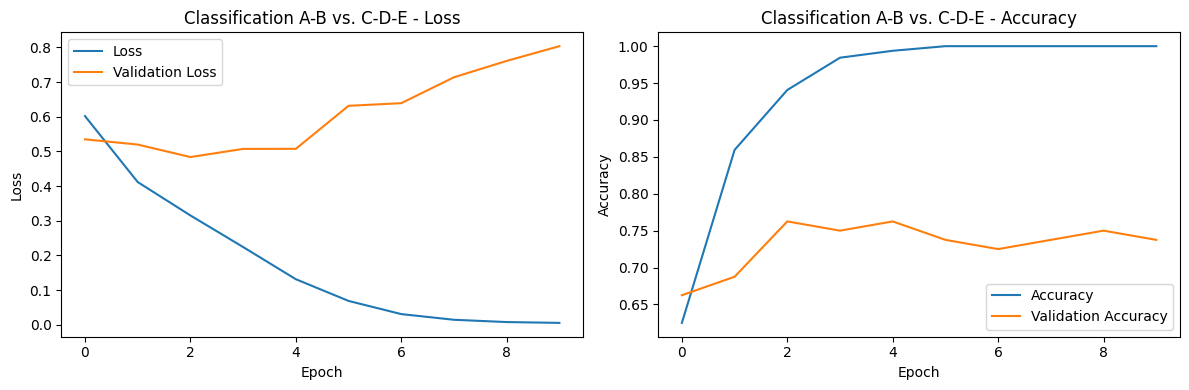

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Classification A-B vs. C-D-E - Loss: 0.6534
Classification A-B vs. C-D-E - Accuracy: 0.8200
Classification A-B vs. C-D-E - Sensitivity: 0.8966
Classification A-B vs. C-D-E - Precision: 0.8125
Classification A-B vs. C-D-E - F1 Score: 0.8525


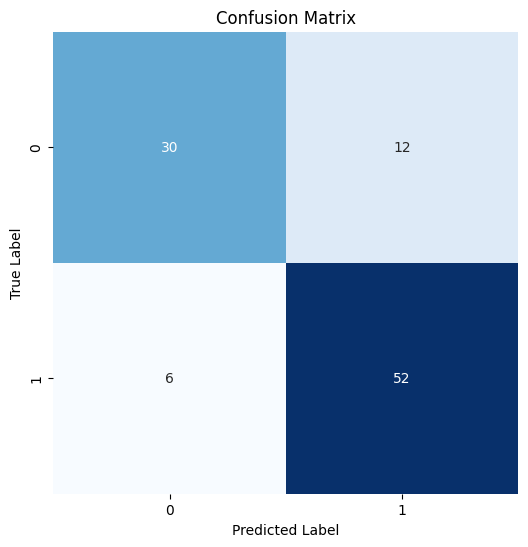

Classification A-B vs. C-D-E - Computational Time: 0 minutes and 6 seconds


In [ ]:
# Run classification for A-B vs. C-D-E
run_classification(['A', 'B'], ['C', 'D', 'E'], 'Classification A-B vs. C-D-E', learning_rate=0.001, batch_size=32, epochs=10, layer_sizes=[64, 32, 16])


# Classification #2 : Healthy (Open eyes) - Seizure  (A-E)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 534,913 (2.04 MB)

 Trainable params: 534,913 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.6798 - loss: 0.6907 - val_accuracy: 0.9062 - val_loss: 0.3321
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - loss: 0.1675 - val_accuracy: 0.9375 - val_loss: 0.1668
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0761 - val_accuracy: 0.9375 - val_loss: 0.1348
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0130 - val_accuracy: 0.9375 - val_loss: 0.1789
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.9062 - val_loss: 0.2216


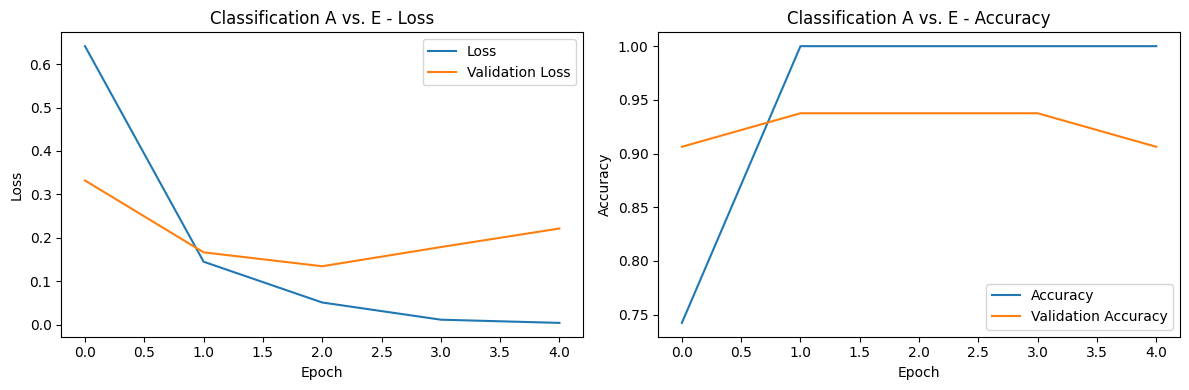

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Classification A vs. E - Loss: 0.4517
Classification A vs. E - Accuracy: 0.8250
Classification A vs. E - Sensitivity: 0.6316
Classification A vs. E - Precision: 1.0000
Classification A vs. E - F1 Score: 0.7742


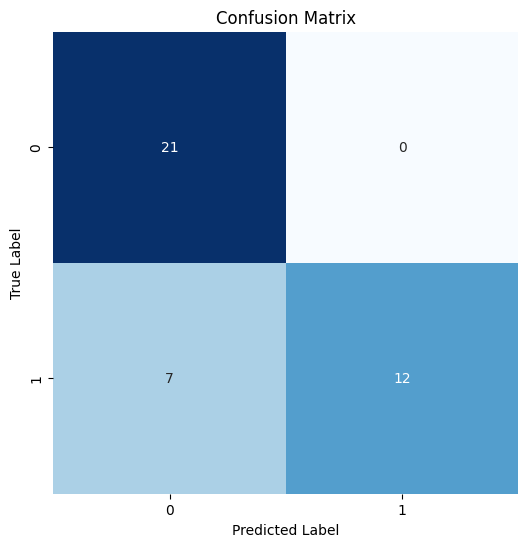

Classification A vs. E - Computational Time: 0 minutes and 11 seconds


In [ ]:
# Run classification for A vs. E
run_classification(['A'], ['E'], 'Classification A vs. E', learning_rate=0.001, batch_size=16, epochs=5, layer_sizes=[128, 64, 32])


# Classification #3 : Healthy (Close eyes) - Seizure  (B-E)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 532,865 (2.03 MB)

 Trainable params: 532,865 (2.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step - accuracy: 0.5677 - loss: 0.6280 - val_accuracy: 0.7812 - val_loss: 0.4601
Epoch 2/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9688 - loss: 0.3317 - val_accuracy: 0.8750 - val_loss: 0.3821
Epoch 3/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9948 - loss: 0.2429 - val_accuracy: 0.9062 - val_loss: 0.3366
Epoch 4/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.1755 - val_accuracy: 0.9062 - val_loss: 0.3064
Epoch 5/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.1215 - val_accuracy: 0.9062 - val_loss: 0.2842
Epoch 6/6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.0849 - val_accuracy: 0.8750 - val_loss: 0.2729


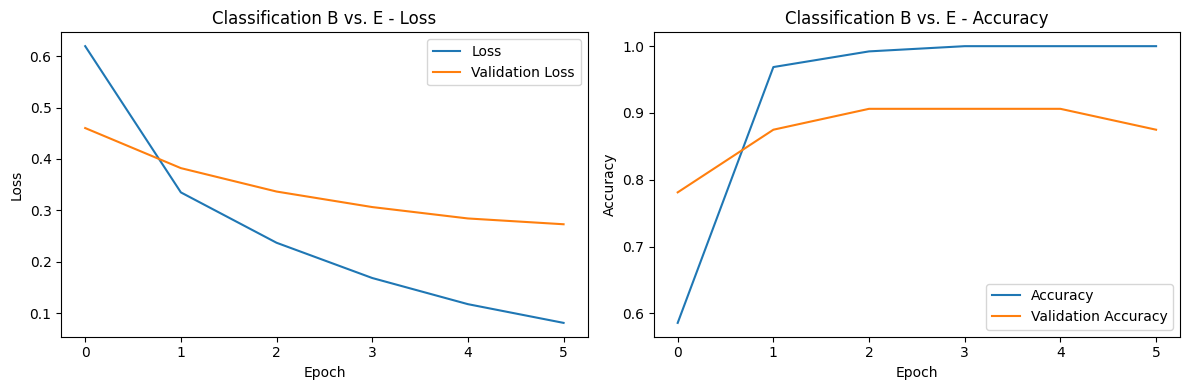

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Classification B vs. E - Loss: 0.4925
Classification B vs. E - Accuracy: 0.7750
Classification B vs. E - Sensitivity: 0.5263
Classification B vs. E - Precision: 1.0000
Classification B vs. E - F1 Score: 0.6897


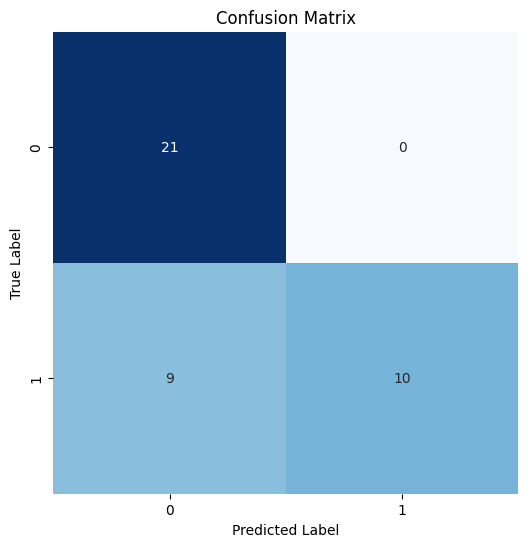

Classification B vs. E - Computational Time: 0 minutes and 10 seconds


In [ ]:
# Run classification for B vs. E
run_classification(['B'], ['E'], 'Classification B vs. E', learning_rate=0.0005, batch_size=64, epochs=6, layer_sizes=[128, 64])


# Classification #4 : Healthy (Open eyes) - Epileptic patient during interictal hippocampal zone  (A-C)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 64)                  │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 265,025 (1.01 MB)

 Trainable params: 265,025 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.4823 - loss: 0.7226 - val_accuracy: 0.6250 - val_loss: 0.6373
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8167 - loss: 0.4610 - val_accuracy: 0.6562 - val_loss: 0.6011
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9771 - loss: 0.2370 - val_accuracy: 0.7188 - val_loss: 0.6394
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9740 - loss: 0.1588 - val_accuracy: 0.8125 - val_loss: 0.5407
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0739 - val_accuracy: 0.7812 - val_loss: 0.8308
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0613 - val_accuracy: 0.7812 - val_loss: 0.8015
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0281 - val_accuracy: 0.8125 - val_loss: 0.6647
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0259 - val_accuracy: 0.8125 - val_loss: 0.5872


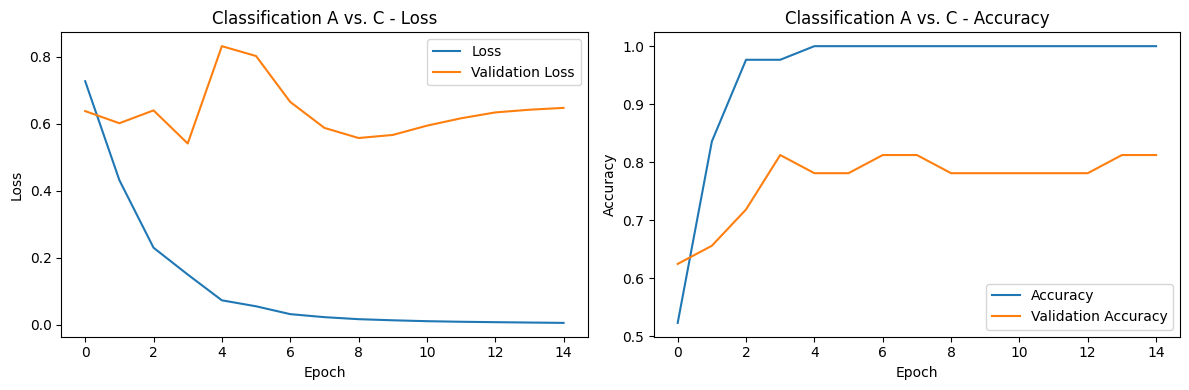

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Classification A vs. C - Loss: 1.0007
Classification A vs. C - Accuracy: 0.6750
Classification A vs. C - Sensitivity: 0.5789
Classification A vs. C - Precision: 0.6875
Classification A vs. C - F1 Score: 0.6286


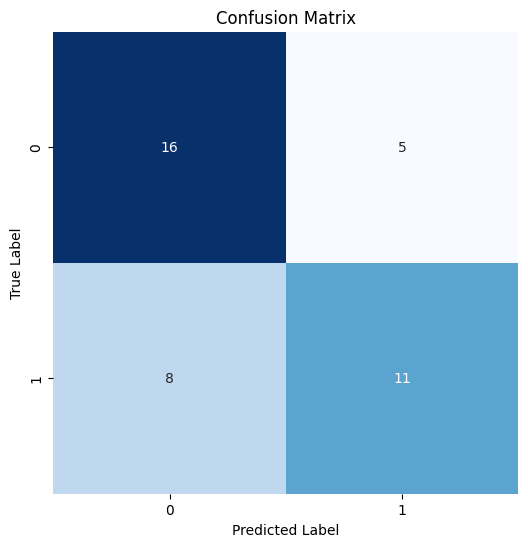

Classification A vs. C - Computational Time: 0 minutes and 13 seconds


In [ ]:
# Run classification for A vs. C
run_classification(['A'], ['C'], 'Classification A vs. C', learning_rate=0.001, batch_size=32, epochs=15, layer_sizes=[64, 32, 16, 8])


# Classification #5 : Healthy (Open eyes) - Epileptic patient during interictal epileptogenic zone  (B-D)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.5198 - loss: 0.7922 - val_accuracy: 0.5938 - val_loss: 0.5709
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8698 - loss: 0.3805 - val_accuracy: 0.7812 - val_loss: 0.4722
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9646 - loss: 0.2195 - val_accuracy: 0.8125 - val_loss: 0.4133
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9885 - loss: 0.1379 - val_accuracy: 0.8125 - val_loss: 0.3652
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9917 - loss: 0.0932 - val_accuracy: 0.8438 - val_loss: 0.3479
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9854 - loss: 0.0686 - val_accuracy: 0.8438 - val_loss: 0.3558
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9854 - loss: 0.0577 - val_accuracy: 0.8438 - val_loss: 0.3492
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0288 - val_accuracy: 0.8438 - val_loss: 0.3399
Epoch 9/30


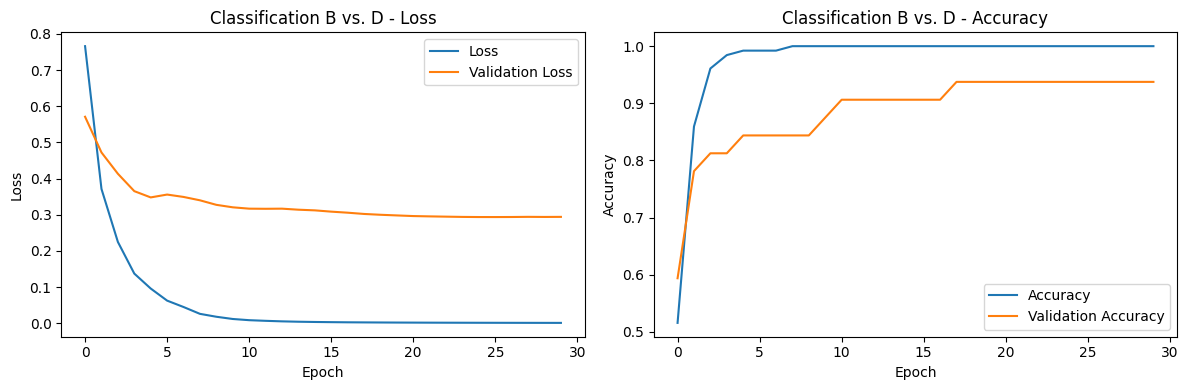

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Classification B vs. D - Loss: 0.8868
Classification B vs. D - Accuracy: 0.7250
Classification B vs. D - Sensitivity: 0.9474
Classification B vs. D - Precision: 0.6429
Classification B vs. D - F1 Score: 0.7660


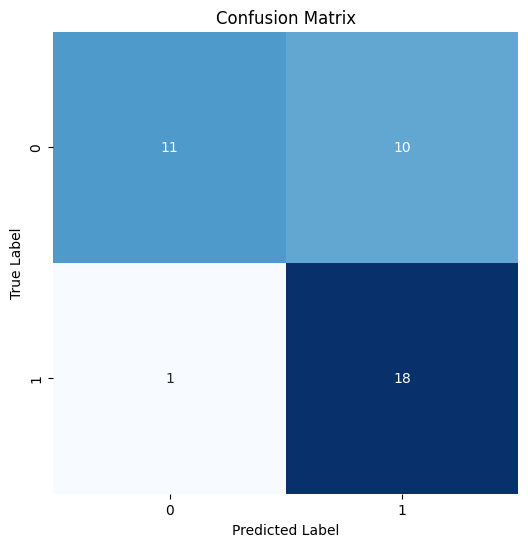

Classification B vs. D - Computational Time: 0 minutes and 7 seconds


In [ ]:
# Run classification for B vs. D
run_classification(['B'], ['D'], 'Classification B vs. D', learning_rate=0.001, batch_size=32, epochs=30, layer_sizes=[64, 32])


# Classification #6 : Epileptic patient during interictal hippocampal zon  - Epileptic   (C-E)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 509ms/step - accuracy: 0.5365 - loss: 0.6935 - val_accuracy: 0.8438 - val_loss: 0.5181
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9948 - loss: 0.3298 - val_accuracy: 0.9375 - val_loss: 0.4060
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 1.0000 - loss: 0.2174 - val_accuracy: 0.9375 - val_loss: 0.3275
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 1.0000 - loss: 0.1364 - val_accuracy: 0.9062 - val_loss: 0.2872
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 1.0000 - loss: 0.0777 - val_accuracy: 0.8750 - val_loss: 0.2813
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 0.0397 - val_accuracy: 0.8750 - val_loss: 0.3008
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 1.0000 - loss: 0.0199 - val_accuracy: 0.8750 - val_loss: 0.3411
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 0.8750 - val_loss: 0.3889
Epoch 9/10

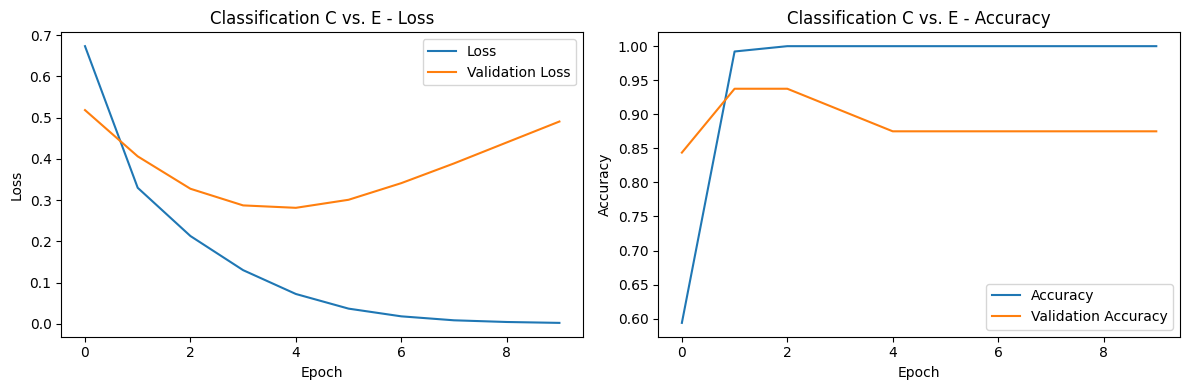

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Classification C vs. E - Loss: 0.7581
Classification C vs. E - Accuracy: 0.7500
Classification C vs. E - Sensitivity: 0.4737
Classification C vs. E - Precision: 1.0000
Classification C vs. E - F1 Score: 0.6429


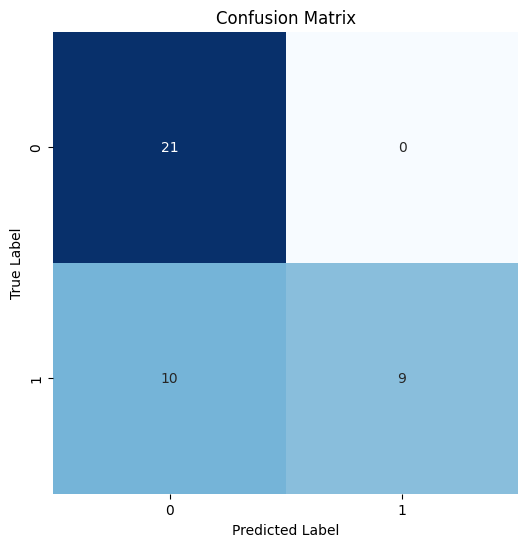

Classification C vs. E - Computational Time: 0 minutes and 7 seconds


In [ ]:
# Run classification for C vs. E
run_classification(['C'], ['E'], 'Classification C vs. E', learning_rate=0.001, batch_size=64, epochs=10, layer_sizes=[128, 64, 32])
